In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Diwali Sales Analysis</strong></h1>
</div>

<img src="https://thumbs.dreamstime.com/b/great-indian-diwali-festival-big-sale-background-paper-graphic-rangoli-fireworks-121957624.jpg?w=768" width=1200>

In [44]:
# import csv file
df = pd.read_csv(r"C:\Users\Reshma\OneDrive\Desktop\manasvi Python Project\Diwali Sales Data.csv", encoding= "unicode_escape")

In [45]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Data Wrangling</strong></h1>
</div>

In [47]:
df.shape

(11251, 15)

In [48]:
df.info

<bound method DataFrame.info of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [49]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [50]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [51]:
# as we have last two columns useless, so we have to remove it form datadf
df = df.drop(["Status", "unnamed1"], axis=1)

In [52]:
# dorp null values from Amount
df = df.dropna(subset=["Amount"], axis = 0)

In [53]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [54]:
# check the duplicates
df.duplicated().sum()

8

In [55]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

In [57]:
# change the type of Amount
df["Amount"] = df["Amount"].astype('int')

In [58]:
# check the unique values in each columns
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Visualize the insights using plots</strong></h1>
</div>

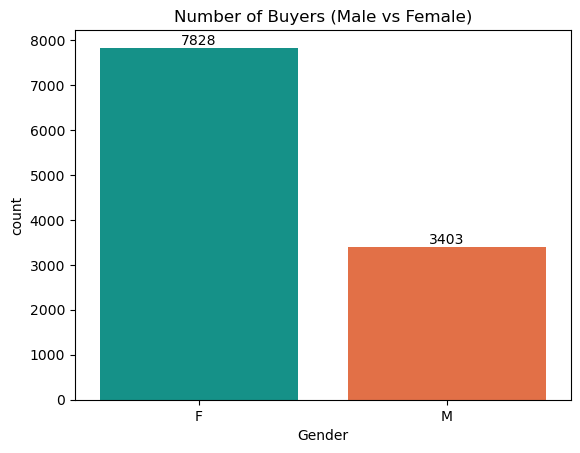

In [60]:
# check how many males and females purchased products
ax = sns.countplot(data=df, x="Gender", hue="Gender", palette={"M": "#fc642d", "F": "#00a699"})
plt.title("Number of Buyers (Male vs Female)")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


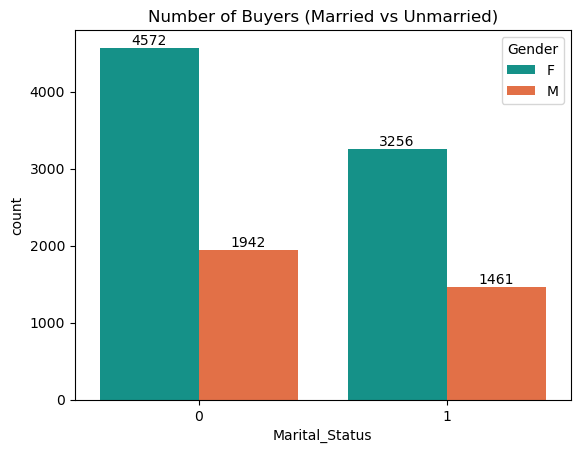

In [61]:
ax = sns.countplot(data=df, x="Marital_Status", hue="Gender", palette={"M": "#fc642d", "F": "#00a699"})
plt.title("Number of Buyers (Married vs Unmarried)")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

- As we see above two graphs, there is total 11231 male and female purchased products during diwali festival.
- In this festival, mostly female purchased diwali products as we see in the first plot, there is 7828 female and 3403 male appears in purchasing products
- When we see it according to marital status in the 2nd plot, there is also mostly female either married or unmarried appears in buying products as compare to men.

In [63]:
sales_gend = df.groupby(df['Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sales_gend

,Gender,Amount
0,F,74307679
1,M,31871146


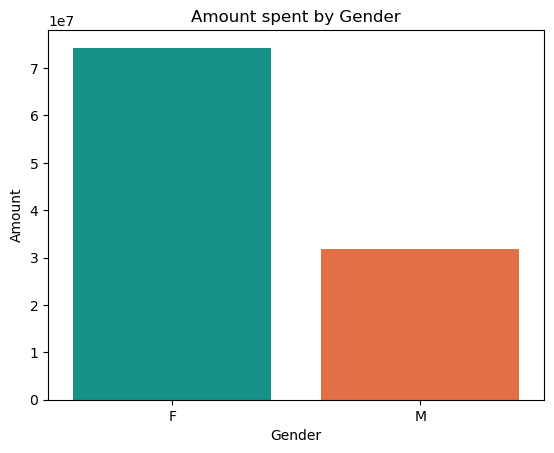

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(
    data=sales_gend,
    x="Gender",
    y="Amount",
    hue="Gender",  # Add this to match palette to categories
    palette={"M": "#fc642d", "F": "#00a699"},
    legend=False  # Hide redundant legend
)

plt.title("Amount spent by Gender")
plt.show()

- As we see that in this festival, total amount spent by female is much more than male, as female spent 74307679 indrs and male spent 31871146 indrs 

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Age Group</strong></h1>
</div>

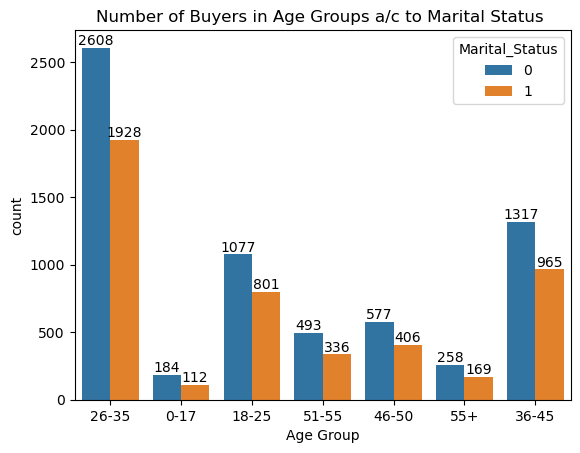

In [67]:
fig = sns.countplot(data = df, x="Age Group", hue="Marital_Status")
plt.title('Number of Buyers in Age Groups a/c to Marital Status ')
for bars in fig.containers:
    fig.bar_label(bars)

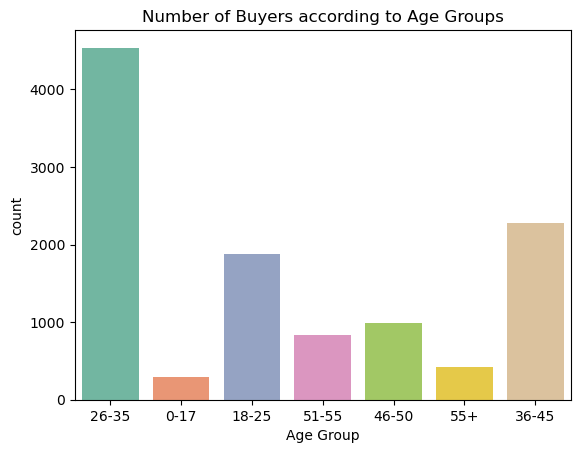

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.countplot(data=df, x="Age Group", hue="Age Group", palette="Set2", legend=False)

plt.title("Number of Buyers according to Age Groups")
plt.show()

In [69]:
# Amount spent by Age Groups
age_amount = df.groupby(df["Age Group"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
age_amount

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


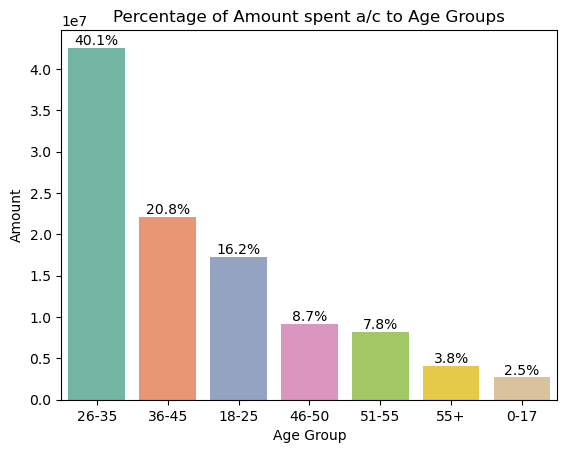

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix the deprecation warning by setting hue and disabling the legend
fig = sns.barplot(data=age_amount, x="Age Group", y="Amount", hue="Age Group", palette="Set2", legend=False)

plt.title('Percentage of Amount spent a/c to Age Groups')

# Add percentage labels
total = sum(age_amount["Amount"])
for i, v in enumerate(age_amount["Amount"]):
    percentage = v / total * 100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

plt.show()

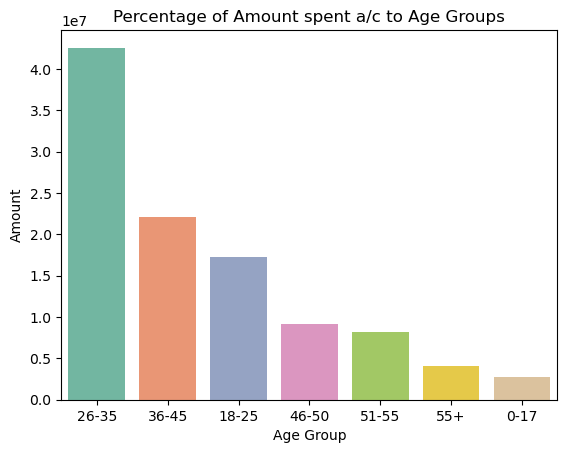

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(
    data=age_amount,
    x="Age Group",
    y="Amount",
    hue="Age Group",        # Required to use palette
    palette="Set2",
    legend=False            # Removes the redundant legend
)

plt.title("Percentage of Amount spent a/c to Age Groups")
plt.show()

- As we see above two plots that the people having age b/w 26-35 are mostly buy diwali products and spent amount 40% from total amount and 36-45 spent almost 21% amount.
- Unmarried people mostly orders and spent amount in diwali products.

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Orders of State</strong></h1>
</div>

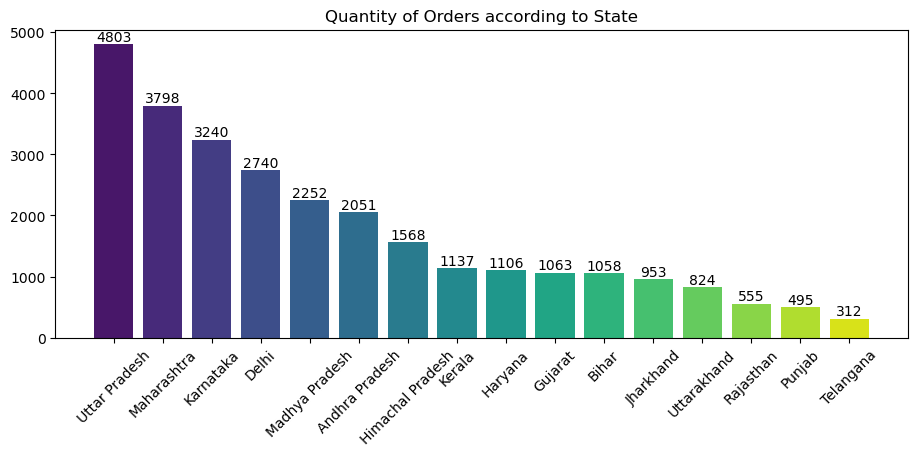

In [123]:
import matplotlib.pyplot as plt

st_orders = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)
plt.figure(figsize=(11,4))

bars = plt.bar(st_orders["State"], st_orders["Orders"], color=palette)
plt.xticks(rotation=45)
plt.title("Quantity of Orders according to State")

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')
plt.show()

In [75]:
st_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
st_amount

,State,Amount
14,Uttar Pradesh,19346055
10,Maharashtra,14404467
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4217871
1,Bihar,4014669
3,Gujarat,3938159


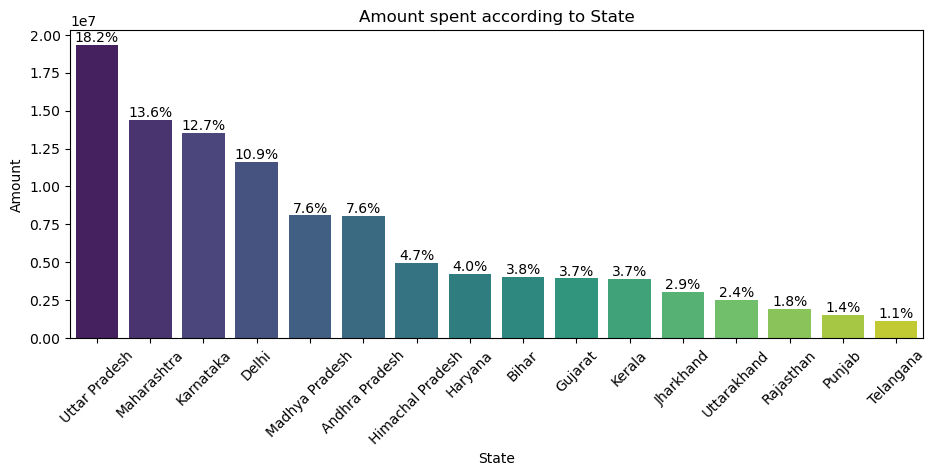

In [76]:
plt.figure(figsize=(11, 4))
fig = sns.barplot(data=st_amount, x="State", y="Amount", hue="State", palette="viridis", dodge=False, legend=False)
plt.legend([],[], frameon=False)  # Hide the legend completely
plt.xticks(rotation=45)
plt.title("Amount spent according to State")

total = sum(st_amount["Amount"])
for i, v in enumerate(st_amount["Amount"]):
    percentage = v / total * 100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- Above two plots shows that top 5 states (Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh) that highly orders and spent amount in online purchasing products at diwali festival. 

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Occupation</strong></h1>
</div>

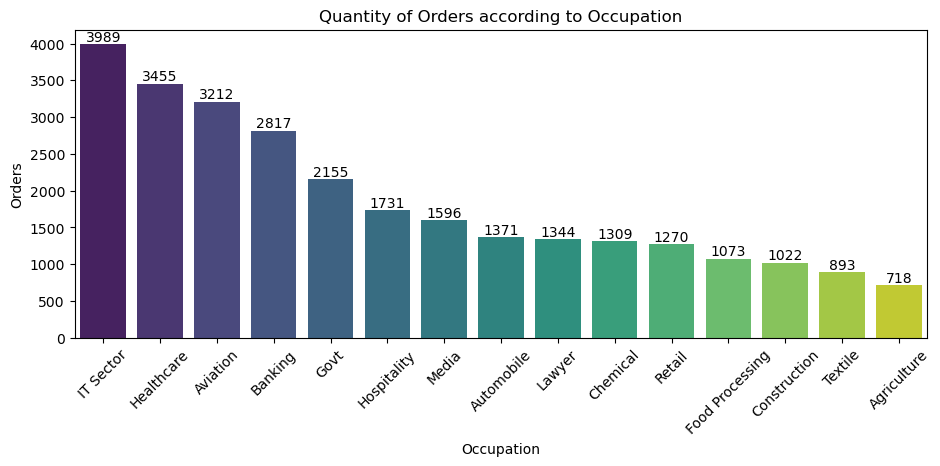

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

ocp_orders = df.groupby(["Occupation"], as_index=False)["Orders"].sum().sort_values(by="Orders", ascending=False)

plt.figure(figsize=(11,4))

colors = sns.color_palette("viridis", n_colors=len(ocp_orders))

fig = sns.barplot(
    data=ocp_orders,
    x="Occupation",
    y="Orders",
    hue="Occupation",   # Fixes the warning
    palette=colors,
    dodge=False,
    legend=False
)

plt.xticks(rotation=45)
plt.title("Quantity of Orders according to Occupation")

for bars in fig.containers:
    fig.bar_label(bars)

plt.show()

In [80]:
ocp_amount = df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
ocp_amount

,Occupation,Amount
10,IT Sector,14741862
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6337633
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


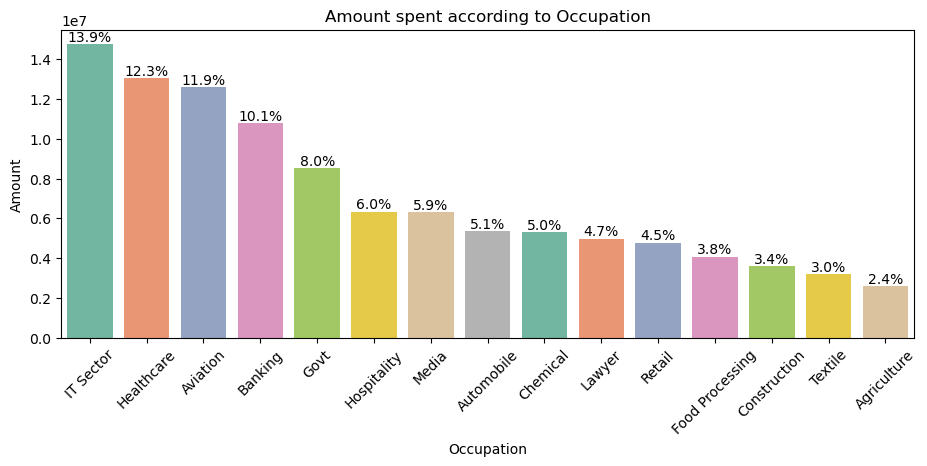

In [145]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data=ocp_amount, x="Occupation", y="Amount", hue="Occupation", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Amount spent according to Occupation")

total = sum(ocp_amount["Amount"])
for i, v in enumerate(ocp_amount["Amount"]):
    percentage = v / total * 100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")


- Above two plots shows that top 5 Occupation (IT Sector, Healthcare, Aviation, Banking, Gobt) that highly orders and spent amount in online purchasing products at diwali festival.

<div style="background-color: #dabcba; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Product_Category</strong></h1>
</div>

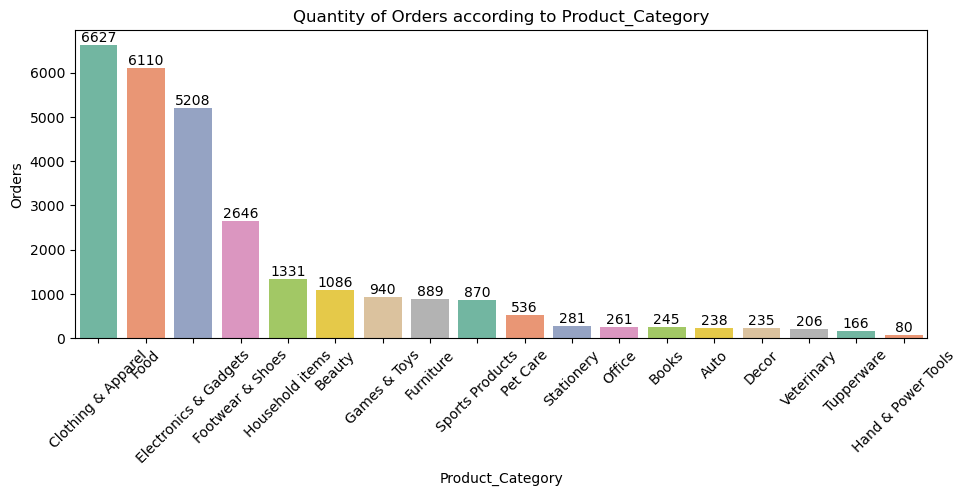

In [143]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data=pc_orders, x="Product_Category", y="Orders", hue="Product_Category", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Quantity of Orders according to Product_Category")

for bars in fig.containers:
    fig.bar_label(bars)

plt.show()


In [85]:
pc_amount = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
pc_amount

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16484472
5,Electronics & Gadgets,15607657
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1935041
15,Stationery,1676051


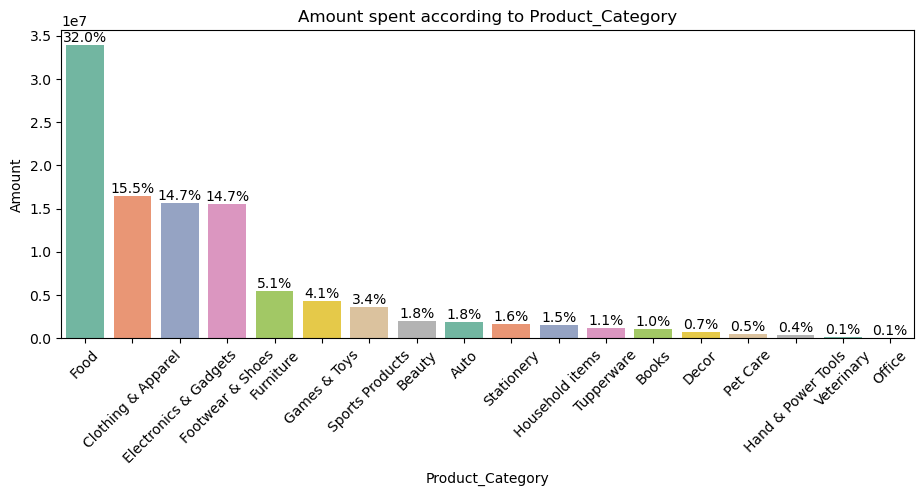

In [147]:
plt.figure(figsize=(11,4))
fig = sns.barplot(data=pc_amount, x="Product_Category", y="Amount", hue="Product_Category", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Amount spent according to Product_Category")

total = sum(pc_amount["Amount"])
for i, v in enumerate(pc_amount["Amount"]):
    percentage = v / total * 100
    plt.text(i, v, f'{percentage:.1f}%', ha="center", va="bottom")

- Above two plots shows that top 5 Product_Category (Food, Clothing & Apparel, Electronics & Gadgets, Footwear & Shoes, Furniture) that highly orders and spent amount in online purchasing products at diwali festival.